<a id='top'></a>

# Record Linkage of FBref and TransferMarkt Datasets
##### Notebook to join the scraped datasets from [FBref](https://fbref.com/en/) provided by [StatsBomb](https://statsbomb.com/) and [TransferMarkt](https://www.transfermarkt.co.uk/),  through [record-linkage](https://pypi.org/project/recordlinkage/), to create one, unified source of information, that can be used for for further analysis of players performance statistics and financial valuations.

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 01/09/2020<br>
Notebook last updated: 01/01/2021

![title](../../img/fbref-logo-banner.png)

![title](../../img/stats-bomb-logo.png)

![title](../../img/transfermarkt-logo-banner.png)

Click [here](#section5) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2), [Data Sources](#section3), and [Data Engineering](#section4) sections. Or click [here](#section6) to jump straight to the Conclusion.

___

<a id='sectionintro'></a>

## <a id='import_libraries'>Introduction</a>
This notebook joins datasets scraped from [FBref.com](https://fbref.com/en/) provided by [StatsBomb](https://statsbomb.com/) using a [Python webscraper](https://github.com/parth1902/Scrape-FBref-data) by [parth1902](https://github.com/parth1902), and [TransferMarkt](https://www.transfermarkt.co.uk/) using the [Tyrone Mings web scraper](https://github.com/FCrSTATS/tyrone_mings) by [FCrSTATS](https://twitter.com/FC_rstats) through [RecordLinkage](https://pypi.org/project/recordlinkage/), to create one, unified source of information, that can be used for for further analysis of players statistics and financial valuations.scrapes data from [TransferMarkt](https://www.transfermarkt.co.uk/) using [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) and the. This landed data is then manipulated as DataFrames using [pandas](http://pandas.pydata.org/).

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/);
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster);
*    [kaggle.com/eddwebster](https://www.kaggle.com/eddwebster); and
*    [hackerrank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![title](../../img/fifa21eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/TransferMarkt%20Web%20Scraping%20and%20Parsing.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Teams](#section3.2)<br>
            1.    [Data Dictionary](#section3.2.1)<br>
            2.    [Creating the DataFrame](#section3.2.2)<br>
            3.    [Initial Data Handling](#section3.2.3)<br>
            4.    [Export the Raw DataFrame](#section3.2.4)<br>
      2.    [Outfielder Players](#section3.3)<br>
            1.    [Data Dictionary](#section3.3.1)<br>
            2.    [Creating the DataFrame](#section3.3.2)<br>
            3.    [Initial Data Handling](#section3.3.3)<br>
            4.    [Export the Raw DataFrame](#section3.3.4)<br>
      3.    [Goalkeepers](#section3.4)<br>
            1.    [Data Dictionary](#section3.4.1)<br>
            2.    [Creating the DataFrame](#section3.4.2)<br>
            3.    [Initial Data Handling](#section3.4.3)<br>
            4.    [Export the Raw DataFrame](#section3.4.4)<br> 
4.    [Data Engineering](#section4)<br>
      1.    [Introduction](#section4.1)<br>
      2.    [Teams](#section4.2)<br>
            1.    [Columns of Interest](#section4.2.1)<br>
            2.    [String Cleaning](#section4.2.2)<br>
            3.    [Converting Data Types](#section4.2.3)<br>
            4.    [Export the Engineered DataFrame](#section4.2.4)<br>
      3.    [Outfielder Players](#section4.3)<br>
            1.    [Columns of Interest](#section4.3.1)<br>
            2.    [String Cleaning](#section4.3.2)<br>
            3.    [Converting Data Types](#section4.3.3)<br>
            4.    [Export the Engineered DataFrame](#section4.3.4)<br>
      4.    [Goalkeepers](#section4.4)<br>
            1.    [Columns of Interest](#section4.4.1)<br>
            2.    [String Cleaning](#section4.4.2)<br>
            3.    [Converting Data Types](#section4.4.3)<br>
            4.    [Export the Engineered DataFrame](#section4.4.4)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      1.    [...](#section5.1)<br>
      2.    [...](#section5.2)<br>
      3.    [...](#section5.3)<br>
6.    [Summary](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [Bibliography](#section8)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    [`RecordLinkage`](https://pypi.org/project/recordlinkage/) for joining of fuzzy datasets; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [1]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd    # version 1.0.3
import os    #  used to read the csv filenames
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os

# Working with JSON
import json
from pandas.io.json import json_normalize

# Web Scraping
import requests
from bs4 import BeautifulSoup
import re

# Fuzzy Matching - Record Linkage
import recordlinkage
import jellyfish
import numexpr as ne

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno    # visually display missing data

# Progress Bar
from tqdm import tqdm    # a clean progress bar library

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print("Setup Complete")

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.1
pandas: 1.0.1
matplotlib: 3.1.3
Seaborn: 0.10.0


### Defined Variables

In [3]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Define Data Paths

In [4]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', )
data_dir = os.path.join(base_dir, 'data')
data_dir_fbref = os.path.join(base_dir, 'data', 'fbref')
data_dir_tm = os.path.join(base_dir, 'data', 'tm')
data_dir_davies = os.path.join(base_dir, 'data', 'Davies')
data_dir_fbref_tm = os.path.join(base_dir, 'data', 'fbref-tm')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
video_dir = os.path.join(base_dir, 'video')

### Notebook Settings

In [5]:
pd.set_option('display.max_columns', None)

---

<a id='section2'></a>

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook explores how to fuzzy match scraped football data from [FBref](https://fbref.com/en/), provided by [StatsBomb](https://statsbomb.com/), and [TransferMarkt](https://www.transfermarkt.co.uk/), using [RecordLinkage](https://pypi.org/project/recordlinkage/) and [pandas](http://pandas.pydata.org/) for data maniuplation through DataFrames.

The aims of this notebook is to result in two, finalised datasets of players and goalkeepers, exported to CSV. This data can be further analysis using python (see [Section 6](#section6) of this notebook), or can be explored using Tableau, PowerBI, Microsoft Excel. These datasets are the following:
*    outfield players
*    goalkeepers

The data used in this notebooks has been scraped using the [FBref](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/FBref.ipynb) and [TransferMarkt](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/TransferMarkt.ipynb) webscraping notebooks.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

### <a id='#section3.1'>3.1. Introduction</a>
This Data Sources section has been has been split into two subsections for the FBref and TransferMarkt datasets.

Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and Cleaned in the Data Engineering section [Section 4](#section4).

We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

### <a id='#section3.2'>3.2. FBref</a>

#### <a id='#section3.2.1'>3.2.1. Import the Datasets</a>

In [6]:
# Define season to join

## Assign season to variable
season = '2020'    # '2020' for the 20/21 season

## Create 'Full Season' and 'Short Season' strings

### Full season
full_season_string = str(int(season)) + '/' + str(int(season) + 1)

### Short season
short_season_string = str((str(int(season))[-2:]) + (str(int(season) + 1)[-2:]))

### Short season
season_filter = str((str(int(season))[-2:]) + '/' + (str(int(season) + 1)[-2:]))

In [7]:
full_season_string

'2020/2021'

In [8]:
short_season_string

'2021'

In [9]:
season_filter

'20/21'

In [10]:
# Import DataFrame as a CSV file
#df_fbref = pd.read_csv(data_dir_fbref + f'/engineered/players_combined/' + f'players_combined_big5_engineered_latest.csv')
df_fbref = pd.read_csv(data_dir + '/export/fbref_players_big5_latest.csv')

#### <a id='#section3.2.2'>3.2.2. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [11]:
# Display the first 5 rows of the raw DataFrame, df_fbref
df_fbref.head()

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,Season,team_name,league_name,league_country,player_lower,firstname_lower,lastname_lower,firstinitial_lower,league_country_lower,nationality_code,nationality_cleaned,position_grouped,outfielder_goalkeeper,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,26,1990,28.0,25.0,2184.0,5.0,1.0,0.0,0.0,7.0,0.0,0.21,0.04,0.25,0.21,0.25,3.1,3.1,1.5,0.13,0.06,0.19,0.13,0.19,24.3,33.0,12.0,4.0,36.4,1.36,0.49,0.15,0.42,0.09,1.9,1.9,845.0,1116.0,75.7,15182.0,7109.0,363.0,411.0,88.3,377.0,471.0,80.0,88.0,183.0,48.1,-0.5,17.0,58.0,28.0,7.0,101.0,895.0,221.0,21.0,0.0,183.0,21.0,42.0,11.0,0.0,1.0,0.0,682.0,131.0,303.0,717.0,175.0,30.0,189.0,4.0,3.0,24.0,19.0,37.0,41.0,1.69,23.0,11.0,4.0,1.0,1.0,3.0,0.12,2.0,0.0,1.0,0.0,0.0,0.0,48.0,30.0,33.0,13.0,2.0,21.0,38.0,55.3,17.0,253.0,78.0,30.8,159.0,71.0,23.0,36.0,5.0,0.0,31.0,36.0,56.0,2.0,1369.0,83.0,448.0,578.0,437.0,39.0,1148.0,17.0,26.0,65.4,20.0,0.0,767.0,4832.0,2651.0,765.0,709.0,92.7,23.0,17.0,0.0,18.0,10.0,3.0,0.0,0.0,0.0,225.0,2.0,6.0,25.0,17/18,Crystal Palace,Premier League,England,patrick van aanholt,patrick,aanholt,p,england,NED,Netherlands,Defender,Outfielder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [12]:
# Display the last 5 rows of the raw DataFrame, df_fbref
df_fbref.tail()

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,Season,team_name,league_name,league_country,player_lower,firstname_lower,lastname_lower,firstinitial_lower,league_country_lower,nationality_code,nationality_cleaned,position_grouped,outfielder_goalkeeper,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
11257,Iván Villar,es ESP,GK,Celta Vigo,23,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20/21,Celta Vigo,La Liga,Spain,ivan villar,ivan,villar,i,spain,ESP,Spain,Goalkeeper,NaN,7.0,7.0,630.0,10.0,1.43,22.0,15.0,0.636,1.0,3.0,3.0,1.0,14.3,2.0,2.0,0.0,0.0,7.0,0.0,0.0,1.0,8.6,0.32,-0.4,-0.05,30.0,96.0,31.3,150.0,28.0,46.7,39.2,56.0,46.4,40.8,67.0,5.0,7.5,8.0,1.14,17.2
11258,Rubén Yáñez,es ESP,GK,Getafe,27,1993,

[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns a tuple representing the dimensionality of the DataFrame.

In [13]:
# Print the shape of the raw DataFrame, df_fbref
print(df_fbref.shape)

(11262, 205)


[columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) returns the column labels of the DataFrame.

In [14]:
# Features (column names) of the raw DataFrame, df_fbref
df_fbref.columns

Index(['player', 'nationality', 'position', 'squad', 'age', 'birth_year',
       'games', 'games_starts', 'minutes', 'goals',
       ...
       'passes_length_avg_gk', 'goal_kicks', 'pct_goal_kicks_launched',
       'goal_kick_length_avg', 'crosses_gk', 'crosses_stopped_gk',
       'crosses_stopped_pct_gk', 'def_actions_outside_pen_area_gk',
       'def_actions_outside_pen_area_per90_gk', 'avg_distance_def_actions_gk'],
      dtype='object', length=205)

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [15]:
# Data types of the features of the raw DataFrame, df_fbref
df_fbref.dtypes

player                                    object
nationality                               object
position                                  object
squad                                     object
age                                        int64
                                          ...   
crosses_stopped_gk                       float64
crosses_stopped_pct_gk                   float64
def_actions_outside_pen_area_gk          float64
def_actions_outside_pen_area_per90_gk    float64
avg_distance_def_actions_gk              float64
Length: 205, dtype: object

In [16]:
# Displays all one hundered and four columns, commented out but shown for reference
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_fbref.dtypes)

player                                    object
nationality                               object
position                                  object
squad                                     object
age                                        int64
birth_year                                 int64
games                                    float64
games_starts                             float64
minutes                                  float64
goals                                    float64
assists                                  float64
pens_made                                float64
pens_att                                 float64
cards_yellow                             float64
cards_red                                float64
goals_per90                              float64
assists_per90                            float64
goals_assists_per90                      float64
goals_pens_per90                         float64
goals_assists_pens_per90                 float64
xg                  

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [17]:
# Info for the raw DataFrame, df_fbref
df_fbref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11262 entries, 0 to 11261
Columns: 205 entries, player to avg_distance_def_actions_gk
dtypes: float64(186), int64(2), object(17)
memory usage: 17.6+ MB


The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [18]:
# Description of the raw DataFrame, df_fbref, showing some summary statistics for each numberical column in the DataFrame
df_fbref.describe()

,age,birth_year,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
count,11262.000000,11262.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.000000,10497.00000

Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

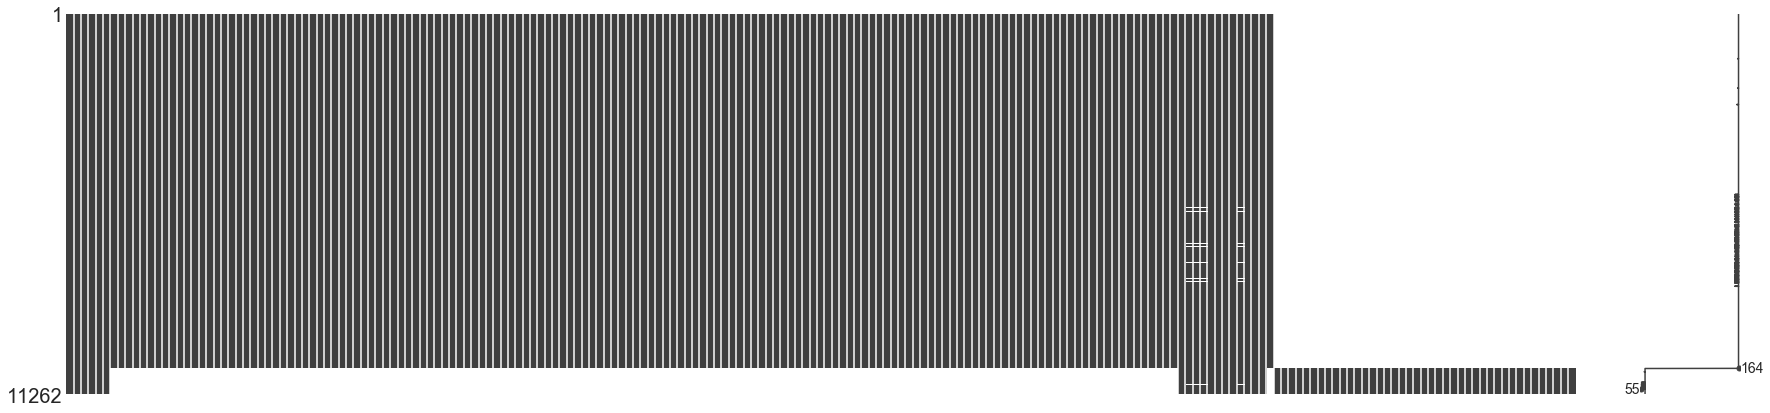

In [19]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_fbref
msno.matrix(df_fbref, figsize = (30, 7))

In [20]:
# Counts of missing values
null_value_stats = df_fbref.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

games                                      765
games_starts                               765
minutes                                    765
goals                                      765
assists                                    765
                                         ...  
crosses_stopped_gk                       10497
crosses_stopped_pct_gk                   10497
def_actions_outside_pen_area_gk          10497
def_actions_outside_pen_area_per90_gk    10497
avg_distance_def_actions_gk              10497
Length: 193, dtype: int64

The visualisation shows us very quickly that there are no missing values in either of the datasets.

In [21]:
df_fbref[df_fbref['player'] == 'Raheem Sterling']

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,Season,team_name,league_name,league_country,player_lower,firstname_lower,lastname_lower,firstinitial_lower,league_country_lower,nationality_code,nationality_cleaned,position_grouped,outfielder_goalkeeper,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
2374,Raheem Sterling,eng ENG,FW,Manchester City,22,1994,33.0,29.0,2587.0,18.0,11.0,1.0,1.0,4.0,2.0,0.63,0.38,1.01,0.59,0.97,17.2,16.2,6.4,0.60,0.22,0.82,0.56,0.79,28.7,85.0,33.0,0.0,38.8,2.96,1.15,0.20,0.52,0.19,0.8,0.8,999.0,1205.0,82.9,13467.0,2885.0,618.0,703.0,87.9,313.0,371.0,84.4,29.0,50.0,58.0,4.6,53.0,32.0,60.0,6.0,88.0,1188.0,17.0,1.0,4.0,265.0,11.0,47.0,5.0,1.0,0.0,0.0,1036.0,67.0,102.0,171.0,994.0,24.0,6.0,7.0,0.0,11.0,26.0,60.0,134.0,4.65,94.0,1.0,16.0,5.0,18.0,27.0,0.94,20.0,0.0,1.0,0.0,6.0,0.0,22.0,17.0,8.0,8.0,6.0,5.0,14.0,35.7,9.0,300.0,99.0,33.0,59.0,107.0,134.0,31.0,1.0,0.0,30.0,14.0,2.0,0.0,1603.0,11.0,96.0,503.0,1116.0,247.0,1587.0,46.0,90.0,51.1,52.0,1.0,1307.0,8057.0,4812.0,1650.0,1312.0,79.5,70.0,64.0,1.0,39.0,58.0,19.0,6.0,1.0,0.0,161.0,4.0,8.0,33.3,17/18,Manchester City,Premier League,England,raheem sterling,raheem,sterling,r,england,ENG,England,Forward,Outfielder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### <a id='#section3.3'>3.3. TransferMarkt</a>

#### <a id='#section3.3.1'>3.3.1. Import the Dataset</a>

In [22]:
# Import DataFrame as a CSV file
#df_tm = pd.read_csv(data_dir_tm + f'/engineered/{short_season_string}/bio-status/' + f'tm_bio_status_big5_{short_season_string}_latest.csv')
df_tm = pd.read_csv(data_dir + '/export/tm_bio_status_players_big5_latest.csv')

#### <a id='#section3.3.2'>3.3.2. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [23]:
# Display the first 5 rows of the raw DataFrame, df_tm
df_tm.head()

,tm_id,player_name,birth_day,birth_month,birth_year,pob,cob,dob,position,height,foot,second_citizenship,season,current_club,current_club_country,market_value_euros,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,name_lower,firstname_lower,lastname_lower,firstinitial_lower,league_country_lower,position_code,position_grouped,outfielder_goalkeeper,age,age_when_joining,years_since_joining,years_until_contract_expiry,market_value_pounds
0,497291,nicolás domínguez,28.0,6.0,1998.0,Haedo,Argentina,1998-06-28,midfield - Central Midfield,179.0,right,Italy,2020/2021,bologna fc 1909,italy,10000000.0,2019-08-30,2024-06-30,NaN,NaN,NaN,NaN,M Sab,nicolas dominguez,nicolas,dominguez,n,italy,CM,Midfielder,Outfielder,22.0,21.0,1.0,3.0,8900000.0
1,457221,lucas robertone,18.0,3.0,1997.0,Concordia,Argentina,1997-03-18,midfield - Central Midfield,173.0,right,Italy,2020/2021,ud almería,spain,5500000.0,2020-10-01,2025-06-30,Obligation to buy with conditions,NaN,NaN,NaN,Relatives,lucas robertone,lucas,robertone,l,spain,CM,Midfielder,Outfielder,23.0,23.0,0.0,4.0,4895000.0
2,401521,braian cufré,15.0,12.0,1996.0,Mar de Plata,Argentina,1996-12-15,Defender - Left-Back,179.0,left,NaN,2020/2021,rcd mallorca,spain,4000000.0,2020-09-28,2024-06-30,Obligation to buy with conditions,NaN,NaN,NaN,TARGET4SPORT,braian cufre,braian,cufre,b,spain,LB,Defender,Outfielder,24.0,23.0,0.0,3.0,3560000.0
3,323872,andrés cubas,22.0,5.0,1996.0,Aristóbulo del Valle,Argentina,1996-05-22,midfield - Defensive Midfield,166.0,right,Argentina,2020/2021,nîmes olympique,france,4000000.0,2020-07-17,2024-06-30,NaN,NaN,NaN,NaN,Eleven Talent Group,andres cubas,andres,cubas,a,france,CDM,Midfielder,Outfielder,24.0,24.0,0.0,3.0,3560000.0
4,474800,facundo medina,28.0,5.0,1999.0,Buenos Aires,Argentina,1999-05-28,Defender - Centre-Back,184.0,left,NaN,2020/2021,rc lens,france,8000000.0,2020-07-02,2024-06-30,NaN,NaN,NaN,NaN,Dodici,facundo medina,facundo,medina,f,france,CB,Defender,Outfielder,21.0,21.0,0.0,3.0,7120000.0


In [24]:
# Display the last 5 rows of the raw DataFrame, df_tm
df_tm.tail()

,tm_id,player_name,birth_day,birth_month,birth_year,pob,cob,dob,position,height,foot,second_citizenship,season,current_club,current_club_country,market_value_euros,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,name_lower,firstname_lower,lastname_lower,firstinitial_lower,league_country_lower,position_code,position_grouped,outfielder_goalkeeper,age,age_when_joining,years_since_joining,years_until_contract_expiry,market_value_pounds
7279,154980,moritz fritz,15.0,7.0,1993.0,Bielefeld,Germany,1993-07-15,midfield - Defensive Midfield,192.0,both,NaN,2020/2021,fc viktoria köln,germany,150000.0,2019-07-01,2021-06-30,NaN,NaN,NaN,NaN,TPWE GmbH,moritz fritz,moritz,fritz,m,germany,CDM,Midfielder,Outfielder,27.0,25.0,1.0,0.0,133500.0
7280,83251,steven lewerenz,18.0,5.0,1991.0,Hamburg,Germany,1991-05-18,attack - Left Winger,176.0,both,NaN,2020/2021,fc viktoria köln,germany,200000.0,2020-01-08,2021-06-30,NaN,NaN,NaN,NaN,Sports United GmbH,steven lewerenz,steven,lewerenz,s,germany,LW,Forward,Outfielder,29.0,28.0,0.0,0.0,178000.0
7281,333666,dominik lanius,28.0,3.0,1997.0,Köln,Germany,1997-03-28,Defender - Centre-Back,195.0,right,NaN,2020/2021,fc viktoria köln,germany,150000.0,2019-07-01,2021-06-30,NaN,NaN,NaN,NaN,OmegaSports Dr. G. Zarotis,dominik lanius,dominik,lanius,d,germany,CB,Defender,Outfielder,23.0,22.0,1.0,0.0,133500.0
7282,120427,rené klingenburg,29.0,12.0,1993.0,Oberhausen,Germany,1993-12-29,midfield - Central Midfield,190.0,both,NaN,2020/2021,fc viktoria köln,germany,275000.0,2020-08-06,2021-06-30,Relegation/Promotion clause,NaN,NaN,NaN,VIDA 11,rene klingenburg,rene,klingenburg,r,germany,CM,Midfielder,Outfielder,27.0,26.0,0.0,0.0,244750.0
7283,85036,andré dej,6.0,2.0,1992.0,Köln,Germany,1992-02-06,midfield - Central Midfield,174.0,both,Germany,2020/2021,fc viktoria köln,germany,175000.0,2019-07-01,2021-06-30,NaN,NaN,NaN,NaN,GoalSky,andre dej,andre,dej,a,germany,CM,Midfielder,Outfielder,28.0,27.0,1.0,0.0,155750.0


[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns a tuple representing the dimensionality of the DataFrame.

In [25]:
# Print the shape of the raw DataFrame, df_tm
print(df_tm.shape)

(7284, 36)


[columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) returns the column labels of the DataFrame.

In [26]:
# Features (column names) of the raw DataFrame, df_fbref
df_fbref.columns

Index(['player', 'nationality', 'position', 'squad', 'age', 'birth_year',
       'games', 'games_starts', 'minutes', 'goals',
       ...
       'passes_length_avg_gk', 'goal_kicks', 'pct_goal_kicks_launched',
       'goal_kick_length_avg', 'crosses_gk', 'crosses_stopped_gk',
       'crosses_stopped_pct_gk', 'def_actions_outside_pen_area_gk',
       'def_actions_outside_pen_area_per90_gk', 'avg_distance_def_actions_gk'],
      dtype='object', length=205)

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [27]:
# Data types of the features of the raw DataFrame, df_tm
df_tm.dtypes

tm_id                            int64
player_name                     object
birth_day                      float64
birth_month                    float64
birth_year                     float64
pob                             object
cob                             object
dob                             object
position                        object
height                         float64
foot                            object
second_citizenship              object
season                          object
current_club                    object
current_club_country            object
market_value_euros             float64
joined                          object
contract_expires                object
contract_option                 object
on_loan_from                    object
on_loan_from_country            object
loan_contract_expiry            object
player_agent                    object
name_lower                      object
firstname_lower                 object
lastname_lower           

In [28]:
# Displays all one hundered and four columns, commented out but shown for reference
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_tm.dtypes)

tm_id                            int64
player_name                     object
birth_day                      float64
birth_month                    float64
birth_year                     float64
pob                             object
cob                             object
dob                             object
position                        object
height                         float64
foot                            object
second_citizenship              object
season                          object
current_club                    object
current_club_country            object
market_value_euros             float64
joined                          object
contract_expires                object
contract_option                 object
on_loan_from                    object
on_loan_from_country            object
loan_contract_expiry            object
player_agent                    object
name_lower                      object
firstname_lower                 object
lastname_lower           

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [29]:
# Info for the raw DataFrame, df_tm
df_tm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7284 entries, 0 to 7283
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tm_id                        7284 non-null   int64  
 1   player_name                  7284 non-null   object 
 2   birth_day                    7270 non-null   float64
 3   birth_month                  7270 non-null   float64
 4   birth_year                   7270 non-null   float64
 5   pob                          6902 non-null   object 
 6   cob                          7284 non-null   object 
 7   dob                          7270 non-null   object 
 8   position                     7284 non-null   object 
 9   height                       7111 non-null   float64
 10  foot                         6780 non-null   object 
 11  second_citizenship           2193 non-null   object 
 12  season                       7284 non-null   object 
 13  current_club      

The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [30]:
# Description of the raw DataFrame, df_tm, showing some summary statistics for each numberical column in the DataFrame
df_tm.describe()

,tm_id,birth_day,birth_month,birth_year,height,market_value_euros,age,age_when_joining,years_since_joining,years_until_contract_expiry,market_value_pounds
count,7284.000000,7270.000000,7270.000000,7270.000000,7111.000000,7.284000e+03,7270.000000,7270.000000,7284.000000,6960.000000,7.284000e+03
mean,279562.778830,15.307153,6.007428,1994.498900,182.499508,4.053458e+06,25.510041,23.696286,1.419687,1.143822,3.607577e+06
std,186523.141149,8.764863,3.502914,4.547505,6.594779,1.046912e+07,4.548916,4.310602,1.928704,1.141582,9.317514e+06
min,1013.000000,1.000000,1.000000,1977.000000,155.000000,0.000000e+00,16.000000,15.000000,0.000000,-1.000000,0.000000e+00
25%,123727.250000,8.000000,3.000000,1991.000000,178.000000,2.000000e+05,22.000000,20.000000,0.000000,0.000000,1.780000e+05
50%,253721.000000,15.000000,6.000000,1995.000000,183.000000,6.000000e+05,25.000000,23.000000,1.000000,1.000000,5.340000e+05
75%,398039.000000,23.000000,9.000000,1998.000000,187.000000,2.500000e+06,29.000000,27.000000,2.000000,2.000000,2.225000e+06
max,838804.000000,31.000000,12.000000,2004.000000,206.000000,1.800000e+08,43.000000,41.000000,18.000000,7.000000,1.602000e+08


Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

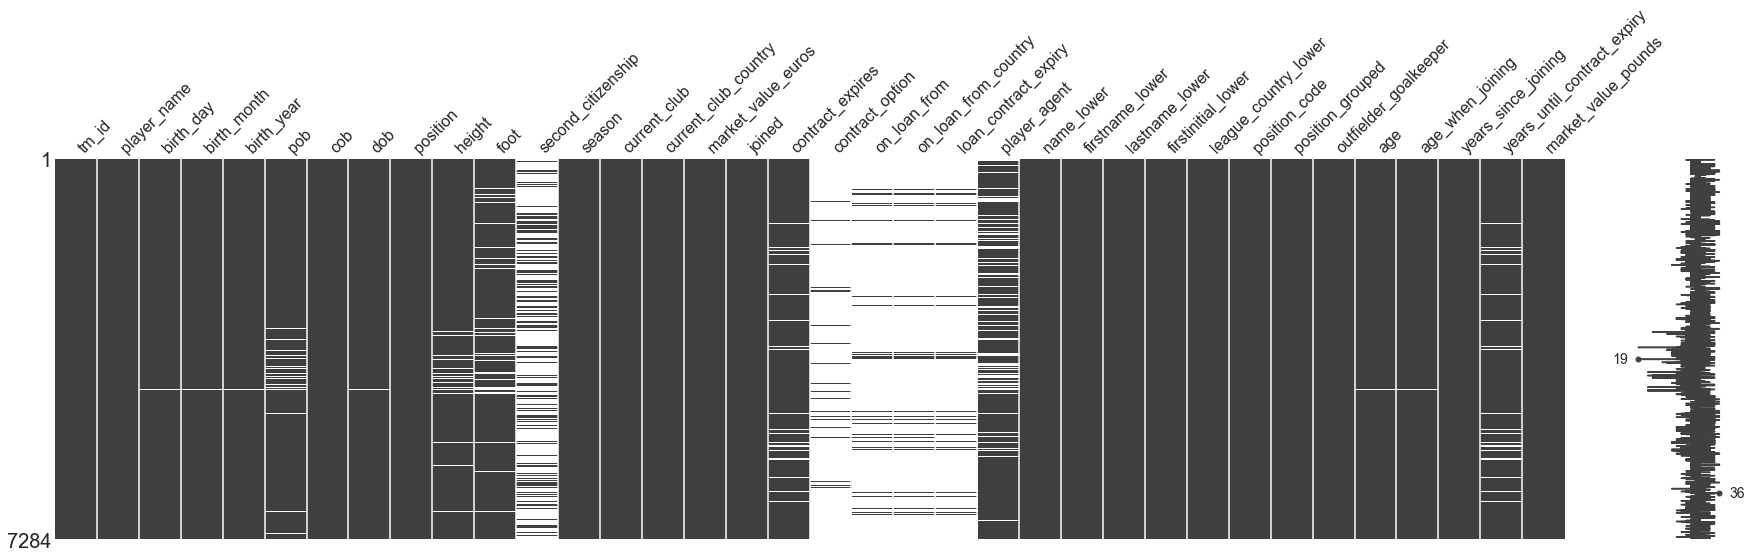

In [31]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_tm
msno.matrix(df_tm, figsize = (30, 7))

In [32]:
# Counts of missing values
null_value_stats = df_tm.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

birth_day                        14
birth_month                      14
birth_year                       14
pob                             382
dob                              14
height                          173
foot                            504
second_citizenship             5091
contract_expires                324
contract_option                6669
on_loan_from                   6562
on_loan_from_country           6562
loan_contract_expiry           6649
player_agent                   1224
age                              14
age_when_joining                 14
years_until_contract_expiry     324
dtype: int64

The visualisation shows us very quickly that there very few missing values in either of the outfield or goalkeeper datasets, and therefore this data is ready to be joined to the [FBref](https://fbref.com/en/) data.

In [33]:
df_tm[df_tm['player_name'] == 'raheem sterling']

,tm_id,player_name,birth_day,birth_month,birth_year,pob,cob,dob,position,height,foot,second_citizenship,season,current_club,current_club_country,market_value_euros,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,name_lower,firstname_lower,lastname_lower,firstinitial_lower,league_country_lower,position_code,position_grouped,outfielder_goalkeeper,age,age_when_joining,years_since_joining,years_until_contract_expiry,market_value_pounds
2589,134425,raheem sterling,8.0,12.0,1994.0,Kingston,Jamaica,1994-12-08,attack - Left Winger,170.0,right,Jamaica,2020/2021,manchester city,england,110000000.0,2015-07-14,2023-06-30,NaN,NaN,NaN,NaN,Colossal Sports Management,raheem sterling,raheem,sterling,r,england,LW,Forward,Outfielder,26.0,20.0,5.0,2.0,97900000.0


## <a id='#section4'>4. Fuzzy Match Datasets - Record Linkage</a>

### <a id='#section4.1'>4.1. Introduction</a>
Now we have our two engineered DataFrames for [FBref](https://fbref.com/en/) and [TransferMarkt](https://www.transfermarkt.co.uk/) data, we are now read to merge them to form one dataset.

We are required to join two data sets together that do not have a common unique identifier and are required to use a third-party Python library - [record linkage](https://pypi.org/project/recordlinkage/), installed using pip install recordlinkage. [record linkage](https://pypi.org/project/recordlinkage/) provides a simple interface to link records in or between data sources. 

<b>'Record linkage'</b> is the term used by statisticians, epidemiologists, and historians, among others, to describe the process of joining records from one data source with another that describe the same entity ([source](https://en.wikipedia.org/wiki/Record_linkage)).

Record linkage is necessary when joining different data sets based on entities that may or may not share a common identifier (e.g., database key, URI, National identification number), which may be due to differences in record shape, storage location, or curator style or preference. A data set that has undergone RL-oriented reconciliation may be referred to as being cross-linked. Record linkage is referred to as data linkage in many jurisdictions, but the two are the same process.

The toolkit provides most of the tools needed for record linkage and deduplication. The package contains indexing methods, functions to compare records and classifiers. The package is developed for research and the linking of small or medium sized files.

For a full guide on how to use record linkage, see the official documentation [here](https://recordlinkage.readthedocs.io/en/latest/) and also this worked example by [Chris Moffitt](https://twitter.com/chris1610) [here](https://pbpython.com/record-linking.html)

### <a id='#section4.2'>4.2. Join the FBref and TM Datasets using Record Linkage</a>

The first step is to create a indexer object.

The indexing module is used to make pairs of records. These pairs are called candidate links or candidate matches. There are several indexing algorithms available such as blocking and sorted neighborhood indexing. See the following references for background information about indexation

One key concept is that we can use blocking to limit the number of comparisons. For instance, we know that it is very likely that we only want to compare records that have the same last name, first name initial and birth year. We can use this knowledge to setup a block on these columns in both DataFrames:

In [34]:
# Record Linkage Step 1 - Create an indexer object
indexer = recordlinkage.Index()
indexer.block(left_on = ['firstinitial_lower', 'birth_year'], 
              right_on = ['firstinitial_lower', 'birth_year'])    # removed 'age' as they don't match in the two datasets

<Index>

In [35]:
"""
# Record Linkage Step 1 - Create an indexer object
indexer = recordlinkage.Index()
indexer.block(left_on = ['firstinitial_lower', 'birth_year', 'outfielder_goalkeeper', 'league_country_lower'], 
              right_on = ['firstinitial_lower', 'birth_year', 'outfielder_goalkeeper' 'league_country_lower'])    # removed 'age' as they don't match in the two datasets
"""

"\n# Record Linkage Step 1 - Create an indexer object\nindexer = recordlinkage.Index()\nindexer.block(left_on = ['firstinitial_lower', 'birth_year', 'outfielder_goalkeeper', 'league_country_lower'], \n              right_on = ['firstinitial_lower', 'birth_year', 'outfielder_goalkeeper' 'league_country_lower'])    # removed 'age' as they don't match in the two datasets\n"

The next step is to build up all the potential candidates to check:

In [36]:
# Record Linkage Step 2 - Build up all the potential candidates to check:
candidates = indexer.index(df_fbref, df_tm)
print(len(candidates))

306154


Now that we have defined the left and right data sets and all the candidates, we can define how we want to perform the comparison logic using `Compare()`:

In [37]:
# Record Linkage Step 3 - Define how we to perform the comparison logic
compare = recordlinkage.Compare()

compare.string('firstname_lower',
               'firstname_lower',
               method='levenshtein',
               threshold=0.60,
               label='first_name')
compare.string('lastname_lower',
               'lastname_lower',
               method='levenshtein',
               threshold=0.60,
               label='last_name')

features = compare.compute(candidates, df_fbref, df_tm)

In [38]:
"""
# Record Linkage Step 3 - Define how we to perform the comparison logic
compare = recordlinkage.Compare()

compare.string('firstname_lower',
               'firstname_lower',
               method='levenshtein',
               threshold=0.60,
               label='first_name')
compare.string('lastname_lower',
               'lastname_lower',
               method='levenshtein',
               threshold=0.60,
               label='last_name')
compare.string('position_grouped',
               'position_description_cleaned',
               method='levenshtein',
               threshold=0.70,
               label='position')
compare.string('nationality_cleaned',
               'cob',
               method='levenshtein',
               threshold=0.70,
               label='nationality')

features = compare.compute(candidates, df_fbref, df_tm)
"""

"\n# Record Linkage Step 3 - Define how we to perform the comparison logic\ncompare = recordlinkage.Compare()\n\ncompare.string('firstname_lower',\n               'firstname_lower',\n               method='levenshtein',\n               threshold=0.60,\n               label='first_name')\ncompare.string('lastname_lower',\n               'lastname_lower',\n               method='levenshtein',\n               threshold=0.60,\n               label='last_name')\ncompare.string('position_grouped',\n               'position_description_cleaned',\n               method='levenshtein',\n               threshold=0.70,\n               label='position')\ncompare.string('nationality_cleaned',\n               'cob',\n               method='levenshtein',\n               threshold=0.70,\n               label='nationality')\n\nfeatures = compare.compute(candidates, df_fbref, df_tm)\n"

View the potential candidates

In [39]:
# Record Linkage Step 4 - view the potential candidates
features

first_name  last_name
0     273          0.0        0.0
      818          0.0        0.0
      947          0.0        0.0
      952          0.0        0.0
      1001         0.0        0.0
...                ...        ...
10160 5729         0.0        0.0
      6190         0.0        0.0
      6219         0.0        0.0
      6726         0.0        0.0
      7164         0.0        0.0

[306154 rows x 2 columns]

This DataFrame shows the results of all of the comparisons. There is one row for each row in the Company House and Fan360 DataFrames. The columns correspond to the comparisons we defined. A 1 is a match and 0 is not.

Given the large number of records with no matches, it is a little hard to see how many matches we might have. We can sum up the individual scores to see about the quality of the matches.

In [40]:
# Sum up the individual scores to see the quality of the matches.
features.sum(axis=1).value_counts().sort_index(ascending=False)

2.0      8878
1.0     26329
0.0    270947
dtype: int64

To only include high-quality matches, let’s just take all the records with 3 matches out of 3 and create a total score column:

In [41]:
# Show records that have match by index number
potential_matches = features[features.sum(axis=1) == 2].reset_index()
potential_matches

,level_0,level_1,first_name,last_name
0,0,2165,1.0,1.0
1,292,273,1.0,1.0
2,1010,5838,1.0,1.0
3,1636,1153,1.0,1.0
4,2688,2165,1.0,1.0
...,...,...,...,...
8873,9879,207,1.0,1.0
8874,9712,412,1.0,1.0
8875,9926,329,1.0,1.0
8876,10015,141,1.0,1.0


In [42]:
potential_matches['Score'] = potential_matches.loc[:, 'first_name': 'last_name'].sum(axis=1)
#potential_matches['Score'] = potential_matches.loc[:, 'first_name': 'nationality'].sum(axis=1)

# Display DataFrame of potential matches, potential_matches 
potential_matches

,level_0,level_1,first_name,last_name,Score
0,0,2165,1.0,1.0,2.0
1,292,273,1.0,1.0,2.0
2,1010,5838,1.0,1.0,2.0
3,1636,1153,1.0,1.0,2.0
4,2688,2165,1.0,1.0,2.0
...,...,...,...,...,...
8873,9879,207,1.0,1.0,2.0
8874,9712,412,1.0,1.0,2.0
8875,9926,329,1.0,1.0,2.0
8876,10015,141,1.0,1.0,2.0


In [43]:
# Join the FBref Outfielder DataFrame to the potential matches DataFrame
df_merge = pd.merge(potential_matches, df_fbref, left_on='level_0', right_index=True)

# Join the TransferMarkt Outfielder DataFrame to the potential matches DataFrame
df_merge = pd.merge(df_merge, df_tm, left_on='level_1', right_index=True)

Now that we've merged the DataFrames, the next step is to clean the DataFrame, reorder the columns, and only keep the columns of interest.

In [44]:
df_merge

,level_0,level_1,first_name,last_name,Score,player,nationality,position_x,squad,age_x,birth_year_x,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,Season,team_name,league_name,league_country,player_lower,firstname_lower_x,lastname_lower_x,firstinitial_lower_x,league_country_lower_x,nationality_code,nationality_cleaned,position_grouped_x,outfielder_goalkeeper_x,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,tm_id,player_name,birth_day,birth_month,birth_year_y,pob,cob,dob,position_y,height,foot,second_citizenship,season,current_club,current_club_country,market_value_euros,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,name_lower,firstname_lower_y,lastname_lower_y,firstinitial_lower_y,league_country_lower_y,position_code,position_grouped_y,outfielder_goalkeeper_y,age_y,age_when_joining,years_since_joining,years_until_contract_expiry,market_value_pounds
0,0,2165,1.0,1.0,2.0,Patrick van Aanholt,nl NED,DF,Crystal Palace,26,1990,28.0,25.0,2184.0,5.0,1.0,0.0,0.0,7.0,0.0,0.21,0.04,0.25,0.21,0.25,3.1,3.1,1.5,0.13,0.06,0.19,0.13,0.19,24.3,33.0,12.0,4.0,36.4,1.36,0.49,0.15,0.42,0.09,1.9,1.9,845.0,1116.0,75.7,15182.0,7109.0,363.0,411.0,88.3,377.0,471.0,80.0,88.0,183.0,48.1,-0.5,17.0,58.0,28.0,7.0,101.0,895.0,221.0,21.0,0.0,183.0,2

In [45]:
df_merge.shape

(8878, 246)

In [46]:
# Select columns of interest
cols_merge = ['tm_id',
               'player_name',
               'firstname_lower_y',
               'lastname_lower_y',
               'outfielder_goalkeeper_y',
               'birth_day',
               'birth_month',
               'birth_year_y',
               'pob',
               'cob',
               'dob',
               'age_x',
               'age_y',
               'age_when_joining',
               'years_since_joining',
               'years_until_contract_expiry',
               'position_y',
               'position_code',
               'height',
               'foot',
               'second_citizenship',
               'season',
               'current_club',
               'current_club_country',
               'market_value_euros',
               'market_value_pounds',
               'joined',
               'contract_expires',
               'contract_option',
               'on_loan_from',
               'on_loan_from_country',
               'loan_contract_expiry',
               'player_agent',
               'Season',
               'Score']

# Create more concise DataFrame using only columns of interest
df_merge_select = df_merge[cols_merge]

# Order rows by 'value' and matching 'Score' decending (i.e. best matches of 4 out of 4 at the top) 
df_merge_select = df_merge_select.sort_values(by=['market_value_pounds', 'player_name'], ascending=[False, True])

In [47]:
df_merge_select

,tm_id,player_name,firstname_lower_y,lastname_lower_y,outfielder_goalkeeper_y,birth_day,birth_month,birth_year_y,pob,cob,dob,age_x,age_y,age_when_joining,years_since_joining,years_until_contract_expiry,position_y,position_code,height,foot,second_citizenship,season,current_club,current_club_country,market_value_euros,market_value_pounds,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,Season,Score
2544,342229,kylian mbappé,kylian,mbappe,Outfielder,20.0,12.0,1998.0,Paris,France,1998-12-20,18,22.0,19.0,2.0,1.0,attack - Centre-Forward,ST,178.0,right,NaN,2020/2021,paris saint-germain,france,180000000.0,160200000.0,2018-07-01,2022-06-30,NaN,NaN,NaN,NaN,Relatives,17/18,2.0
2545,342229,kylian mbappé,kylian,mbappe,Outfielder,20.0,12.0,1998.0,Paris,France,1998-12-20,18,22.0,19.0,2.0,1.0,attack - Centre-Forward,ST,178.0,right,NaN,2020/2021,paris saint-germain,france,180000000.0,160200000.0,2018-07-01,2022-06-30,NaN,NaN,NaN,NaN,Relatives,17/18,2.0
2548,342229,kylian mbappé,kylian,mbappe,Outfielder,20.0,12.0,1998.0,Paris,France,1998-12-20,19,22.0,19.0,2.0,1.0,attack - Centre-Forward,ST,178.0,right,NaN,2020/2021,paris saint-germain,france,180000000.0,160200000.0,2018-07-01,2022-06-30,NaN,NaN,NaN,NaN,Relatives,18/19,2.0
2554,342229,kylian mbappé,kylian,mbappe,Outfielder,20.0,12.0,1998.0,Paris,France,1998-12-20,20,22.0,19.0,2.0,1.0,attack - Centre-Forward,ST,178.0,right,NaN,2020/2021,paris saint-germain,france,180000000.0,160200000.0,2018-07-01,2022-06-30,NaN,NaN,NaN,NaN,Relatives,19/20,2.0
2559,342229,kylian mbappé,kylian,mbappe,Outfielder,20.0,12.0,1998.0,Paris,France,1998-12-20,22,22.0,19.0,2.0,1.0,attack - Centre-Forward,ST,178.0,right,NaN,2020/2021,paris saint-germain,france,180000000.0,160200000.0,2018-07-01,2022-06-30,NaN,NaN,NaN,NaN,Relatives,20/21,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8770,798925,fodé doucouré,fode,doucoure,Outfielder,3.0,2.0,2001.0,Bamako,Mali,2001-02-03,19,19.0,18.0,1.0,2.0,Defender - Right-Back,RB,172.0,right,NaN,2020/2021,stade reims b,france,0.0,0.0,2019-07-11,2023-06-30,NaN,NaN,NaN,NaN,BLACKSKILL,20/21,2.0
8870,709726,hugo ekitike,hugo,ekitike,Outfielder,20.0,6.0,2002.0,Reims,France,2002-06-20,18,18.0,17.0,1.0,2.0,attack - Right Winger,RW,189.0,right,Cameroon,2020/2021,stade reims b,france,0.0,0.0,2019-07-01,2023-06-30,NaN,NaN,NaN,NaN,NaN,20/21,2.0
7983,484389,kelland watts,kelland,watts,Outfielder,3.0,11.0,1999.0,Alnwick,England,1999-11-03,19,21.0,20.0,0.0,2.0,Defender - Centre-Back,CB,192.0,left,NaN,2020/2021,plymouth argyle,england,0.0,0.0,2020-08-24,2023-06-30,NaN,newcastle united u23,england,2021-05-31,Stellar Football Ltd,19/20,2.0
8298,357967,lasse sörensen,lasse,sorensen,Outfielder,21.0,10.0,1999.0,Vejen,Denmark,1999-10-21,17,21.0,20.0,0.0,2.0,midfield - Central Midfield,CM,185.0,right,NaN,2020/2021,milton keynes dons,england,0.0,0.0,2020-09-04,2023-06-30,NaN,stoke city u23,england,2021-05-31,First Touch,17/18,2.0


In [48]:
# Join the Company House DataFrame to the potential matches DataFrame
df_final = pd.merge(df_fbref, df_merge_select, how='left', left_on=['firstname_lower', 'lastname_lower', 'Season'], right_on=['firstname_lower_y', 'lastname_lower_y', 'Season'])

In [49]:
df_final.head()

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,Season,team_name,league_name,league_country,player_lower,firstname_lower,lastname_lower,firstinitial_lower,league_country_lower,nationality_code,nationality_cleaned,position_grouped,outfielder_goalkeeper,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,tm_id,player_name,firstname_lower_y,lastname_lower_y,outfielder_goalkeeper_y,birth_day,birth_month,birth_year_y,pob,cob,dob,age_x,age_y,age_when_joining,years_since_joining,years_until_contract_expiry,position_y,position_code,height,foot,second_citizenship,season,current_club,current_club_country,market_value_euros,market_value_pounds,joined,contract_expires,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,Score
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,26,1990,28.0,25.0,2184.0,5.0,1.0,0.0,0.0,7.0,0.0,0.21,0.04,0.25,0.21,0.25,3.1,3.1,1.5,0.13,0.06,0.19,0.13,0.19,24.3,33.0,12.0,4.0,36.4,1.36,0.49,0.15,0.42,0.09,1.9,1.9,845.0,1116.0,75.7,15182.0,7109.0,363.0,411.0,88.3,377.0,471.0,80.0,88.0,183.0,48.1,-0.5,17.0,58.0,28.0,7.0,101.0,895.0,221.0,21.0,0.0,183.0,21.0,42.0,11.0,0.0,1.0,0.0,682.0,131.0,303.0,717.0,175.0,30.0,189.0,4.0,3.0,24.0,19.0,37.0,41.0,1.69,23.0,11.0,4.0,1.0,1.0,3.0,0.12,2.0,0.0,1.0

In [50]:
'age_when_joining',
'years_until_contract_expiry',

('years_until_contract_expiry',)

In [51]:
# Select columns of interest
cols_final = ['tm_id',
              'Season',
              'player',
              'player_name',
              'player_lower',
              'age_x',
              'age_y',
              'age_when_joining',
              'dob',
              'pob',
              'cob',
              'nationality_cleaned',
              'nationality_code', 
              'second_citizenship',
              'squad',
             #'current_club',
             #'current_club_country',
              'league_name',
              'league_country',
              'position_code',
              'position',
              'position_y',
              'position_grouped', 
              'outfielder_goalkeeper_y',
              'height',
              'foot',
              'market_value_euros',
              'market_value_pounds',
              'joined',
              'years_since_joining',
              'contract_expires',
              'years_until_contract_expiry',
              'contract_option',
              'on_loan_from',
              'on_loan_from_country',
              'loan_contract_expiry',
              'player_agent',
              'games', 
              'games_starts', 
              'minutes', 
              'goals', 
              'assists', 
              'pens_made', 
              'pens_att', 
              'cards_yellow', 
              'cards_red', 
              'goals_per90', 
              'assists_per90', 
              'goals_assists_per90', 
              'goals_pens_per90', 
              'goals_assists_pens_per90', 
              'xg', 
              'npxg', 
              'xa', 
              'xg_per90', 
              'xa_per90', 
              'xg_xa_per90', 
              'npxg_per90', 
              'npxg_xa_per90', 
              'minutes_90s', 
              'shots_total', 
              'shots_on_target', 
              'shots_free_kicks', 
              'shots_on_target_pct', 
              'shots_total_per90', 
              'shots_on_target_per90', 
              'goals_per_shot', 
              'goals_per_shot_on_target', 
              'npxg_per_shot', 
              'xg_net', 
              'npxg_net', 
              'passes_completed', 
              'passes', 
              'passes_pct', 
              'passes_total_distance', 
              'passes_progressive_distance', 
              'passes_completed_short', 
              'passes_short', 
              'passes_pct_short', 
              'passes_completed_medium', 
              'passes_medium', 
              'passes_pct_medium', 
              'passes_completed_long', 
              'passes_long', 
              'passes_pct_long', 
              'xa_net', 
              'assisted_shots', 
              'passes_into_final_third', 
              'passes_into_penalty_area', 
              'crosses_into_penalty_area', 
              'progressive_passes', 
              'passes_live', 
              'passes_dead', 
              'passes_free_kicks', 
              'through_balls', 
              'passes_pressure', 
              'passes_switches', 
              'crosses', 
              'corner_kicks', 
              'corner_kicks_in', 
              'corner_kicks_out', 
              'corner_kicks_straight', 
              'passes_ground', 
              'passes_low', 
              'passes_high', 
              'passes_left_foot', 
              'passes_right_foot', 
              'passes_head', 
              'throw_ins', 
              'passes_other_body', 
              'passes_offsides', 
              'passes_oob', 
              'passes_intercepted', 
              'passes_blocked', 
              'sca', 
              'sca_per90', 
              'sca_passes_live', 
              'sca_passes_dead', 
              'sca_dribbles', 
              'sca_shots', 
              'sca_fouled', 
              'gca', 
              'gca_per90', 
              'gca_passes_live', 
              'gca_passes_dead', 
              'gca_dribbles', 
              'gca_shots', 
              'gca_fouled', 
              'gca_og_for', 
              'tackles', 
              'tackles_won', 
              'tackles_def_3rd', 
              'tackles_mid_3rd', 
              'tackles_att_3rd', 
              'dribble_tackles', 
              'dribbles_vs', 
              'dribble_tackles_pct', 
              'dribbled_past', 
              'pressures', 
              'pressure_regains', 
              'pressure_regain_pct', 
              'pressures_def_3rd', 
              'pressures_mid_3rd', 
              'pressures_att_3rd', 
              'blocks', 
              'blocked_shots', 
              'blocked_shots_saves', 
              'blocked_passes', 
              'interceptions', 
              'clearances', 
              'errors', 
              'touches', 
              'touches_def_pen_area', 
              'touches_def_3rd', 
              'touches_mid_3rd', 
              'touches_att_3rd', 
              'touches_att_pen_area', 
              'touches_live_ball', 
              'dribbles_completed', 
              'dribbles', 
              'dribbles_completed_pct', 
              'players_dribbled_past', 
              'nutmegs', 
              'carries', 
              'carry_distance', 
              'carry_progressive_distance', 
              'pass_targets', 
              'passes_received', 
              'passes_received_pct', 
              'miscontrols', 
              'dispossessed', 
              'cards_yellow_red',
              'fouls', 
              'fouled', 
              'offsides', 
              'pens_won', 
              'pens_conceded', 
              'own_goals', 
              'ball_recoveries', 
              'aerials_won', 
              'aerials_lost', 
              'aerials_won_pct',
              'games_gk',
              'games_starts_gk', 
              'minutes_gk', 
              'goals_against_gk', 
              'goals_against_per90_gk', 
              'shots_on_target_against', 
              'saves', 
              'save_pct', 
              'wins_gk', 
              'draws_gk', 
              'losses_gk', 
              'clean_sheets', 
              'clean_sheets_pct', 
              'pens_att_gk', 
              'pens_allowed', 
              'pens_saved', 
              'pens_missed_gk', 
              'minutes_90s_gk', 
              'free_kick_goals_against_gk', 
              'corner_kick_goals_against_gk', 
              'own_goals_against_gk', 
              'psxg_gk', 
              'psnpxg_per_shot_on_target_against', 
              'psxg_net_gk', 
              'psxg_net_per90_gk', 
              'passes_completed_launched_gk', 
              'passes_launched_gk', 
              'passes_pct_launched_gk', 
              'passes_gk', 
              'passes_throws_gk', 
              'pct_passes_launched_gk', 
              'passes_length_avg_gk', 
              'goal_kicks', 
              'pct_goal_kicks_launched', 
              'goal_kick_length_avg', 
              'crosses_gk', 
              'crosses_stopped_gk', 
              'crosses_stopped_pct_gk', 
              'def_actions_outside_pen_area_gk', 
              'def_actions_outside_pen_area_per90_gk', 
              'avg_distance_def_actions_gk']


# Create more concise DataFrame using only columns of interest
df_final = df_final[cols_final]

# Order rows by 'company_id_ch' ascending and matching score decending (i.e. best matches of 5 out of 5 at the top) 
df_final = df_final.sort_values(by=['market_value_pounds', 'player'], ascending=[False, True])

In [52]:
df_final.head()

,tm_id,Season,player,player_name,player_lower,age_x,age_y,age_when_joining,dob,pob,cob,nationality_cleaned,nationality_code,second_citizenship,squad,league_name,league_country,position_code,position,position_y,position_grouped,outfielder_goalkeeper_y,height,foot,market_value_euros,market_value_pounds,joined,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
1775,342229.0,17/18,Kylian Mbappé,kylian mbappé,kylian mbappe,18.0,22.0,19.0,1998-12-20,Paris,France,France,FRA,NaN,Paris S-G,Ligue 1,France,ST,FW,attack - Centre-Forward,Forward,Outfielder,178.0,right,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,Relatives,27.0,24.0,2095.0,13.0,9.0,0.0,0.0,2.0,0.0,0.56,0.39,0.95,0.56,0.95,14.5,14.5,7.8,0.62,0.33,0.96,0.62,0.96,23.3,81.0,32.0,0.0,39.5,3.48,1.37,0.16,0.41,0.18,-1.5,-1.5,558.0,701.0,79.6,8087.0,1794.0,324.0,373.0,86.9,174.0,223.0,78.0,35.0,54.0,64.8,1.2,51.0,36.0,33.0,9.0,52.0,674.0,27.0,2.0,1.0,144.0,12.0,62.0,4.0,0.0,0.0,0.0,578.0,38.0,85.0,108.0,573.0,8.0,11.0,0.0,3.0,9.0,18.0,30.0,99.0,4.25,66.0,0.0,14.0,5.0,13.0,14.0,0.60,8.0,0.0,2.0,3.0,1.0,0.0,8.0,4.0,2.0,3

In [53]:
# Rename columns
df_final = df_final.rename(columns={'age_x': 'age',
                                    'age_y': 'age_tm',
                                    'outfielder_goalkeeper_y': 'outfielder_goalkeeper',
                                    'position': 'position_fbref',
                                    'position_y': 'position_TM',
                                    'squad': 'club',
                                    'nationality_cleaned': 'nationality',
                                   }
                          )

In [54]:
df_final.shape

(13183, 221)

In [55]:
df_final_dedupe = df_final.drop_duplicates()

In [56]:
df_final_dedupe.shape

(11305, 221)

In [57]:
df_final_dedupe

,tm_id,Season,player,player_name,player_lower,age,age_tm,age_when_joining,dob,pob,cob,nationality,nationality_code,second_citizenship,club,league_name,league_country,position_code,position_fbref,position_TM,position_grouped,outfielder_goalkeeper,height,foot,market_value_euros,market_value_pounds,joined,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
1775,342229.0,17/18,Kylian Mbappé,kylian mbappé,kylian mbappe,18.0,22.0,19.0,1998-12-20,Paris,France,France,FRA,NaN,Paris S-G,Ligue 1,France,ST,FW,attack - Centre-Forward,Forward,Outfielder,178.0,right,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,Relatives,27.0,24.0,2095.0,13.0,9.0,0.0,0.0,2.0,0.0,0.56,0.39,0.95,0.56,0.95,14.5,14.5,7.8,0.62,0.33,0.96,0.62,0.96,23.3,81.0,32.0,0.0,39.5,3.48,1.37,0.16,0.41,0.18,-1.5,-1.5,558.0,701.0,79.6,8087.0,1794.0,324.0,373.0,86.9,174.0,223.0,78.0,35.0,54.0,64.8,1.2,51.0,36.0,33.0,9.0,52.0,674.0,27.0,2.0,1.0,144.0,12.0,62.0,4.0,0.0,0.0,0.0,578.0,38.0,85.0,108.0,573.0,8.0,11.0,0.0,3.0,9.0,18.0,30.0,99.0,4.25,66.0,0.0,14.0,5.0,13.0,14.0,0.60,8.0,0.0,2.0,3.0,1.0,0.0,8.0,4.0,2.0,3.0,3.

In [58]:
df_final[df_final['player'] == 'Raheem Sterling']

,tm_id,Season,player,player_name,player_lower,age,age_tm,age_when_joining,dob,pob,cob,nationality,nationality_code,second_citizenship,club,league_name,league_country,position_code,position_fbref,position_TM,position_grouped,outfielder_goalkeeper,height,foot,market_value_euros,market_value_pounds,joined,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
2640,134425.0,17/18,Raheem Sterling,raheem sterling,raheem sterling,22.0,26.0,20.0,1994-12-08,Kingston,Jamaica,England,ENG,Jamaica,Manchester City,Premier League,England,LW,FW,attack - Left Winger,Forward,Outfielder,170.0,right,110000000.0,97900000.0,2015-07-14,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,Colossal Sports Management,33.0,29.0,2587.0,18.0,11.0,1.0,1.0,4.0,2.0,0.63,0.38,1.01,0.59,0.97,17.2,16.2,6.4,0.60,0.22,0.82,0.56,0.79,28.7,85.0,33.0,0.0,38.8,2.96,1.15,0.20,0.52,0.19,0.8,0.8,999.0,1205.0,82.9,13467.0,2885.0,618.0,703.0,87.9,313.0,371.0,84.4,29.0,50.0,58.0,4.6,53.0,32.0,60.0,6.0,88.0,1188.0,17.0,1.0,4.0,265.0,11.0,47.0,5.0,1.0,0.0,0.0,1036.0,67.0,102.0,171.0,994.0,24.0,6.0,7.0,0.0,11.0,26.0,60.0,134.0,4.65,94.0,1.0,16.0,5.0,18.0,27.0

In [59]:
df_null = df_final_dedupe[df_final_dedupe['market_value_euros'].isnull()]

In [60]:
df_null

,tm_id,Season,player,player_name,player_lower,age,age_tm,age_when_joining,dob,pob,cob,nationality,nationality_code,second_citizenship,club,league_name,league_country,position_code,position_fbref,position_TM,position_grouped,outfielder_goalkeeper,height,foot,market_value_euros,market_value_pounds,joined,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
1554,NaN,17/18,Aaron Lennon,NaN,aaron lennon,NaN,NaN,NaN,NaN,NaN,NaN,England,ENG,NaN,Burnley,Premier League,England,NaN,"MF,FW",NaN,Midfielder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,13.0,1118.0,0.0,2.0,0.0,0.0,2.0,0.0,0.00,0.16,0.16,0.00,0.16,0.6,0.6,1.1,0.05,0.09,0.14,0.05,0.14,12.4,10.0,4.0,0.0,40.0,0.81,0.32,0.00,0.0,0.06,-0.6,-0.6,202.0,292.0,69.2,3267.0,845.0,106.0,131.0,80.9,79.0,111.0,71.2,13.0,27.0,48.1,0.9,8.0,10.0,10.0,2.0,21.0,291.0,1.0,0.0,0.0,59.0,4.0,16.0,0.0,0.0,0.0,0.0,219.0,19.0,54.0,26.0,253.0,8.0,1.0,3.0,0.0,11.0,8.0,24.0,20.0,1.60,13.0,0.0,2.0,4.0,1.0,3.0,0.24,2.0,0.0,0.0,1.0,0.0,0.0,20.0,13.0,6.0,12.0,2.0,4.0,17.0,23.5,13.0,212.0,46.0,21.7,83.0,84.0,45.0,25.0,5.0,0.0,20.0,12.0,11.0,0.0,414.0,18.0,7

In [61]:
#df_null.to_csv(data_dir + '/test_null_tm_fbref.csv', index=None, header=True)

### <a id='#section4.3'>4.3. Add DAVIES data from American Soccer Analysis</a>

In [94]:
# Import DataFrame as a CSV file
df_davies = pd.read_csv(data_dir_davies + '/engineered/' + 'davies_big5_latest.csv')

In [95]:
# Join the Bio and Status DataFrames to form one, unified DataFrame
df_final_davies = pd.merge(df_final_dedupe, df_davies, left_on=['player_lower', 'Season'], right_on=['name_lower', 'Season'], how='left')

In [96]:
df_final_davies = df_final_davies.sort_values(by='DAVIES', ascending=False)

In [97]:
df_final_davies = df_final_davies.drop(['player_name',
                                        'player_lower',
                                        'Player',
                                        'Nation',
                                        'CurrentAge',
                                        'Team',
                                        'League',
                                        'Position',
                                        'Min', 
                                        'Starts',
                                        'firstname_lower',
                                        'lastname_lower',
                                        'firstinitial_lower',
                                        'name_lower'], axis=1)

In [99]:
df_final_davies = df_final_davies.rename(columns={'TeamElo': 'team_elo',
                                                  'AgeDuringSeason': 'age_during_season',
                                                  'PlayStyle': 'play_style_davies',
                                                  'PercentLeftFooted': 'percentage_left_footed_davies',
                                                  'PercentRightFooted': 'percentage_right_footed_davies',
                                                  'Footedness': 'footedness_davies',
                                                  'DAVIES': 'DAVIES',
                                                  'DAVIESPer90': 'DAVIES_p90',
                                                  'xGoalsAdded': 'xGoalsAdded_davies',
                                                  'xGoalsAddedAbovePlayStyle': 'xGoalsAddedAbovePlayStyle_davies',
                                                  'xGoalsAddedPer90': 'xGoalsAddedPer90_davies',
                                                  'Salary($)': 'Salary($)_davies',
                                                  'xSalary($)': 'xSalary($)_davies',
                                                  'CurrentMarketValue(€)': 'CurrentMarketValue(€)_davies',
                                                  'xMarketValue(€)': 'xMarketValue(€)_davies',
                                                  'xGAM': 'xGAM_davies'
                                               })

In [100]:
df_final_dedupe.shape

(11305, 221)

In [101]:
df_final_davies.shape

(11746, 235)

In [102]:
df_final_davies_dedupe = df_final_davies.drop_duplicates()

In [103]:
df_final_davies_dedupe.shape

(11662, 235)

In [104]:
df_final_davies_dedupe.head()

,tm_id,Season,player,age,age_tm,age_when_joining,dob,pob,cob,nationality,nationality_code,second_citizenship,club,league_name,league_country,position_code,position_fbref,position_TM,position_grouped,outfielder_goalkeeper,height,foot,market_value_euros,market_value_pounds,joined,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,team_elo,age_during_season,play_style_davies,percentage_left_footed_davies,percentage_right_footed_davies,footedness_davies,DAVIES,DAVIES_p90,xGoalsAdded_davies,xGoalsAddedAbovePlayStyle_davies,xGoalsAddedPer90_davies,Salary($)_davies,xSalary($)_davies,CurrentMarketValue(€)_davies,xMarketValue(€)_davies,xGAM_davies
39,28003.0,17/18,Lionel Messi,30.0,33.0,18.0,1987-06-24,Rosario,Argentina,Argentina,ARG,Spain,Barcelona,La Liga,Spain,RW,"FW,MF",attack - Right Winger,Forward,Outfielder,170.0,left,100000000.0,89000000.0,2005-07-01,15.0,2021-06-30,0.0,NaN,NaN,NaN,NaN,Relatives,36.0,32.0,3002.0,34.0,12.0,2.0,4.0,3.0,0.0,1.02,0.36,1.38,0.96,1.32,25.3,22.3,13.6,0.76,0.41,1.17,0.67,1.08,33.4,194.0,92.0,47.0,47.4,5.82,2.76,0.16,0.35,0.12,8.7,9.7,1532.0,1947.0,78.7,26046.0,866

Let's export the merged DataFrame, `df_final` as a CSV file.

In [105]:
# Export DataFrame as a CSV file

## Export a copy to the 'archive' subfolder of the TM folder, including the date
df_final_davies_dedupe.to_csv(data_dir + f'/fbref-tm/archive/fbref_tm_big5_combined_last_updated_{today}.csv', index=None, header=True)

## Export another copy to the TM folder called 'latest' (can be overwritten)
df_final_davies_dedupe.to_csv(data_dir + '/fbref-tm/fbref_tm_big5_combined_latest.csv', index=None, header=True)

## Export another copy to the TM folder called 'latest' (can be overwritten)
df_final_davies_dedupe.to_csv(data_dir + '/export/fbref_tm_big5_combined_latest.csv', index=None, header=True)

## <a id='#section5'>5. Exploratory Data Analysis</a>

In [106]:
df_final_davies_dedupe.head()

,tm_id,Season,player,age,age_tm,age_when_joining,dob,pob,cob,nationality,nationality_code,second_citizenship,club,league_name,league_country,position_code,position_fbref,position_TM,position_grouped,outfielder_goalkeeper,height,foot,market_value_euros,market_value_pounds,joined,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,team_elo,age_during_season,play_style_davies,percentage_left_footed_davies,percentage_right_footed_davies,footedness_davies,DAVIES,DAVIES_p90,xGoalsAdded_davies,xGoalsAddedAbovePlayStyle_davies,xGoalsAddedPer90_davies,Salary($)_davies,xSalary($)_davies,CurrentMarketValue(€)_davies,xMarketValue(€)_davies,xGAM_davies
39,28003.0,17/18,Lionel Messi,30.0,33.0,18.0,1987-06-24,Rosario,Argentina,Argentina,ARG,Spain,Barcelona,La Liga,Spain,RW,"FW,MF",attack - Right Winger,Forward,Outfielder,170.0,left,100000000.0,89000000.0,2005-07-01,15.0,2021-06-30,0.0,NaN,NaN,NaN,NaN,Relatives,36.0,32.0,3002.0,34.0,12.0,2.0,4.0,3.0,0.0,1.02,0.36,1.38,0.96,1.32,25.3,22.3,13.6,0.76,0.41,1.17,0.67,1.08,33.4,194.0,92.0,47.0,47.4,5.82,2.76,0.16,0.35,0.12,8.7,9.7,1532.0,1947.0,78.7,26046.0,866

In [107]:
df_final_davies_dedupe[df_final_davies_dedupe['player'] == 'Raheem Sterling']

,tm_id,Season,player,age,age_tm,age_when_joining,dob,pob,cob,nationality,nationality_code,second_citizenship,club,league_name,league_country,position_code,position_fbref,position_TM,position_grouped,outfielder_goalkeeper,height,foot,market_value_euros,market_value_pounds,joined,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,team_elo,age_during_season,play_style_davies,percentage_left_footed_davies,percentage_right_footed_davies,footedness_davies,DAVIES,DAVIES_p90,xGoalsAdded_davies,xGoalsAddedAbovePlayStyle_davies,xGoalsAddedPer90_davies,Salary($)_davies,xSalary($)_davies,CurrentMarketValue(€)_davies,xMarketValue(€)_davies,xGAM_davies
25,134425.0,17/18,Raheem Sterling,22.0,26.0,20.0,1994-12-08,Kingston,Jamaica,England,ENG,Jamaica,Manchester City,Premier League,England,LW,FW,attack - Left Winger,Forward,Outfielder,170.0,right,110000000.0,97900000.0,2015-07-14,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,Colossal Sports Management,33.0,29.0,2587.0,18.0,11.0,1.0,1.0,4.0,2.0,0.63,0.38,1.01,0.59,0.97,17.2,16.2,6.4,0.60,0.22,0.82,0.56,0.79,28.7,85.0,33.0,0.0,38.8,2.96,1.15,0.20,0.52,0.19,0.8,0.8,999.

## <a id='#section6'>6. Summary</a>
This notebook matches the scraped datasets from [FBref](https://fbref.com/en/) provided by [StatsBomb](https://statsbomb.com/) and [TransferMarkt](https://www.transfermarkt.co.uk/),  through [record-linkage](https://pypi.org/project/recordlinkage/), to create one, unified source of information, that can be used for for further analysis of players performance statistics and financial valuations.

With this notebook we now have aggregated player performance data for players in the 'Big 5' European leagues for the 17/18-present seasons, along with their corresponding TransferMarkt valuations and contractual information.

## <a id='#section7'>7. Next Steps</a>
This data is now ready to be exported and analysed in further Jupyter notebooks or Tableau.

The Data Engineering subfolder in GitHub can be found [here](https://github.com/eddwebster/football_analytics/tree/master/notebooks/B\)%20Data%20Engineering) and a static version of the record linkage notebook in which the FBref data is joined to TransferMarkt data can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/B%29%20Data%20Engineering/Record%20Linkage%20of%20FBref%20and%20TransferMarkt%20Datasets.ipynb).

## <a id='#section8'>8. References</a>

#### Fuzzy Matching through Record Linkage
*    Record Linkage Wiki: https://en.wikipedia.org/wiki/Record_linkage
*    [Official Record Linkage documentation web](https://recordlinkage.readthedocs.io/en/latest/about.html)
*    [Official Record Linkage documentation PDF](https://readthedocs.org/projects/recordlinkage/downloads/pdf/stable/)
     -    [0. Preprocessing](https://recordlinkage.readthedocs.io/en/latest/ref-preprocessing.html)
     -    [1. Indexing](https://recordlinkage.readthedocs.io/en/latest/ref-index.html)
     -    [2. Comparing](https://recordlinkage.readthedocs.io/en/latest/ref-compare.html)
     -    [3. Classification](https://recordlinkage.readthedocs.io/en/latest/ref-classifiers.html)
     -    [4. Evaluation](https://recordlinkage.readthedocs.io/en/latest/ref-evaluation.html)
*    Evaluation:https://recordlinkage.readthedocs.io/en/latest/ref-evaluation.html
*    Python Tools for Record Linking and Fuzzy Matching by Chris Moffitt: https://pbpython.com/record-linking.html
*    [Python Tools for Record Linking and Fuzzy Matching](https://pbpython.com/record-linking.html). For more information for record linking and fuzzy matching.
*    [Python Package Index (PyPI) Jellyfish library](https://pypi.org/project/jellyfish/).

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)